<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : P66 - Classification of MNIST Handwriting using Convolution Neural Network

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






### A Beginner’s Guide to Keras: Digit Recognition in 30 Minutes

**Step 1:** Load the necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
import numpy as np

**Step 2:** Load the mnist handwriting dataset from keras.datasets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


5


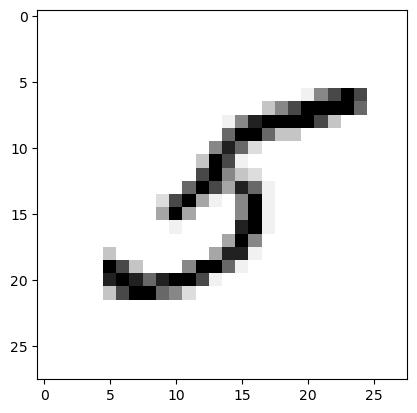

In [3]:
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Let’s verify the sizes of the training and testing datasets:

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Next, we may also wish to explore the dependent variable, stored in y_train. Let’s print all labels until the digit that we visualized above:

In [5]:
print(y_train[:image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


**Step 3:** Cleaning/preparing the Data: reshape each image to the format of (M x N x 1). Also, normalize the image data by dividing each pixel value by 255 (since RGB value can range from 0 to 255):    

In [6]:
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = np.array(x_train.reshape(x_train.shape[0], img_rows, img_cols, 1), 'float32')
x_test = np.array(x_test.reshape(x_test.shape[0], img_rows, img_cols, 1), 'float32')

x_train /= 255
x_test /= 255

In [7]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**Step 4:** Design a Model: The model design process is the most complex factor, having a direct impact on the performance of the model. For this tutorial, we’ll use this design from the Keras Documentation.

To create the model, we first initialize a sequential model. It creates an empty model object. The first step is to add a convolutional layer which takes the input image.

Use:
1. Conv2D with node size of 32, kernel_size=(3, 3)
2. activation = ReLU
3. Input share using number or img_rows and img_cols


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

Next, we add another convolutional layer, followed by a pooling layer (max poolsize - 2,2). Set it to 64 nodes, (3,3) and use ReLU

In [9]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Next, we add a “dropout” layer. While neural networks are trained on huge datasets, a problem of overfitting may occur. To avoid this issue, we randomly drop units and their connections during the training process. In this case, we’ll drop 25% of the units:

In [10]:
model.add(Dropout(0.25))


Next, we add a flattening layer to convert the previous hidden layer into a 1D array:

In [11]:
model.add(Flatten())

Once we’ve flattened the data into a 1D array, we can add a dense hidden layer (Node= 128, activation = ReLU), which is normal to a traditional neural network. Next, add another dropout layer (0.5) before adding a final dense layer which classifies the data (nodes = number of classes, activation = Softmax)

In [12]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### Compile and Train Model
In the model design process, we’ve created an empty model without an objective function. We need to compile the model and specify a loss function, an optimizer function and a metric to assess model performance.

We need to use a sparse_categorical_crossentropy loss function in case we have an integer-dependent variable. For a vector-based dependent variable like a ten-size array as the output of each test case, use categorical_crossentropy. In this example, we’ll use the adam optimizer. The metric is the basis of assessment of our model performance, though it’s only for us to judge and isn’t used in the training step.

Reference: This exercise is adapted from https://www.sitepoint.com/keras-digit-recognition-tutorial/

**Step 5:** Compile the model using the above settings

In [13]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

We’re now ready to train the model using the .fit() method. We need to specify an epoch and batch size when training the model. An epoch is one forward pass and one backward pass of all training examples. A batch size is the number of training examples in one forward or backward pass.

In [14]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 49s 104ms/step - loss: 0.2478 - accuracy: 0.9251 - val_loss: 0.0505 - val_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0862 - accuracy: 0.9741 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 3/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0337 - val_accuracy: 0.9901
Epoch 4/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0542 - accuracy: 0.9838 - val_loss: 0.0313 - val_accuracy: 0.9896
Epoch 5/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0461 - accuracy: 0.9857 - val_loss: 0.0304 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0293 - val_accuracy: 0.9904
Epoch 7/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0270 - val_ac

**Step 6:** Evaluate the model

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026926394551992416
Test accuracy: 0.9925000071525574


**Step 7:** Save the model (optional)

In [16]:
model.save("test_model.h5")

**Step 8:** Perform some prediction? How well will your model perform?

In [17]:
!pip install imageio

                                              0.0/313.2 kB ? eta -:--:--
     -------------------------------------  307.2/313.2 kB 9.3 MB/s eta 0:00:01
     -------------------------------------- 313.2/313.2 kB 6.4 MB/s eta 0:00:00


In [18]:
import imageio
import numpy as np
from matplotlib import pyplot as plt

im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

C:\Users\Asus\AppData\Local\Temp\ipykernel_11976\3740176180.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("https://i.imgur.com/a3Rql9C.png")


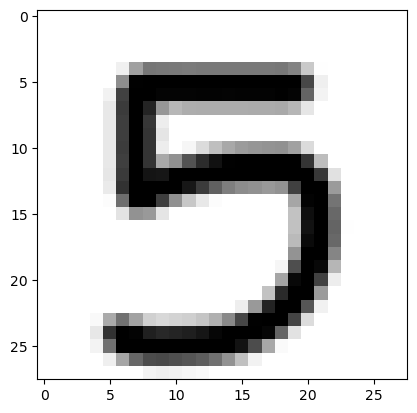

In [19]:
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [20]:
# reshape the image
gray = gray.reshape(1, img_rows, img_cols, 1)

# normalize image
gray /= 255

In [21]:
# load the model
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
print(prediction.argmax())

1/1 [==============================] - 0s 130ms/step
5
